In [1]:
import working_with_fits as wwf
import working_with_crtf as crtf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import profiles as prof
from scipy.optimize import curve_fit
from astropy.wcs import WCS
from astropy.wcs import utils
from astropy.coordinates import SkyCoord 
from astropy.coordinates import ICRS, FK5

# Lets prepare input for slicing in CASA

In [ ]:
#fits to work with
directory = '../SVS13/espirales/'
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [ ]:
crtf.pixels_to_list(directory+'pixels_S1_ini-test.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S1_end-test.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S2_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S2_end.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S3_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S3_end.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S2_duda_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S2_duda_end.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S3_duda_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S3_duda_end.crtf', hdr)

# Working with profiles

In [2]:
coordA = '03h29m03.7456s +31d16m03.773s'
coordB = '03h29m03.7686s +31d16m03.773s'
posA= SkyCoord(coordA, frame=FK5)
posB= SkyCoord(coordB, frame=FK5)

## S1

In [3]:
directory = '../SVS13/espirales/'
file_base = directory+'profiles/profiles_S1'
file_name = [file_base+'_'+str(i)+'.dat' for i in range(1,22)]
profile = [np.loadtxt(file) for file in file_name]
dist =  [i[:,0] for i in profile]
value = [i[:,1] for i in profile] 

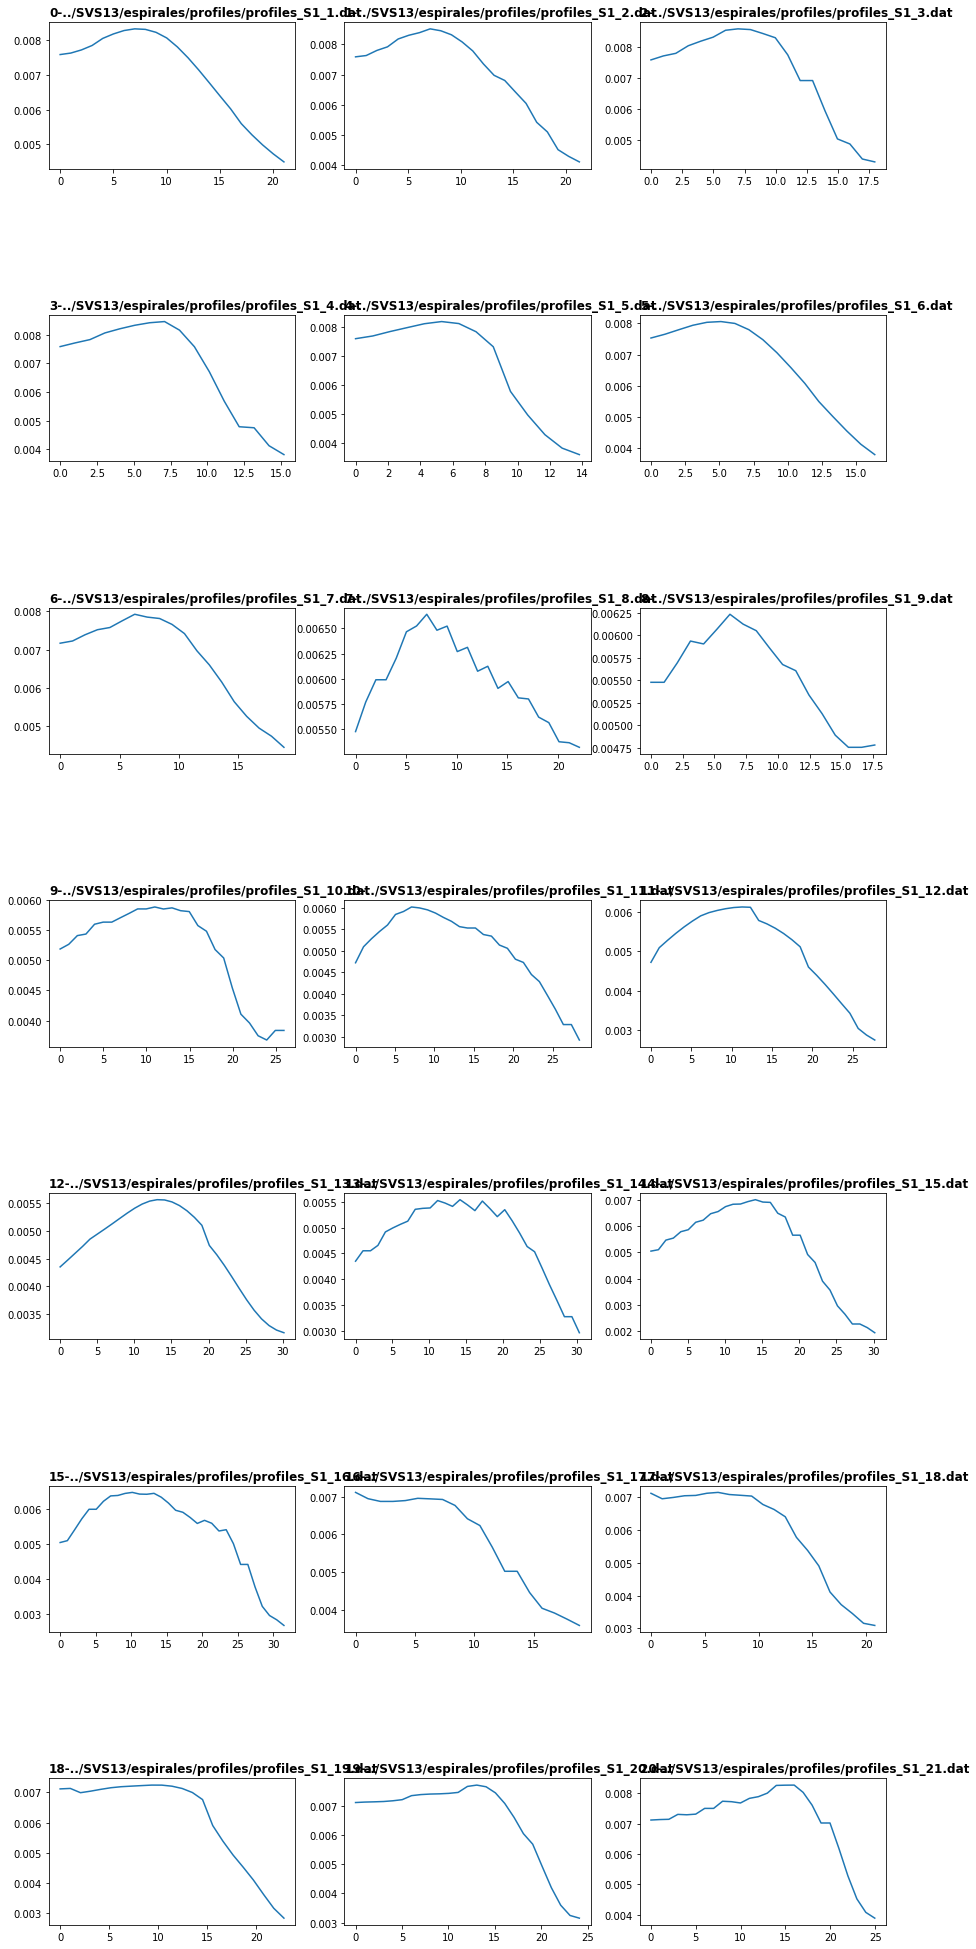

In [4]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_name)):
    # Find the right spot on the plot
    plt.subplot(np.ceil(len(file_name)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(dist[num], value[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_name[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

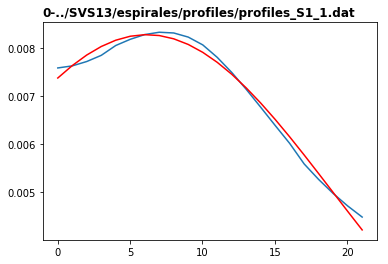

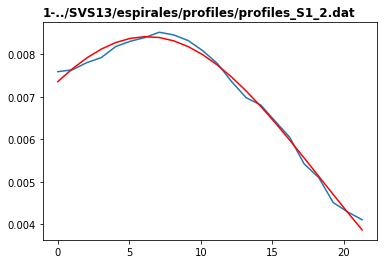

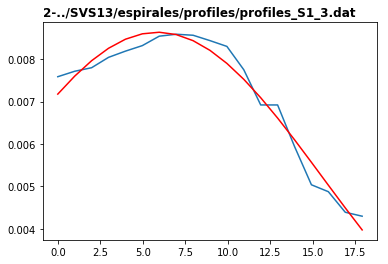

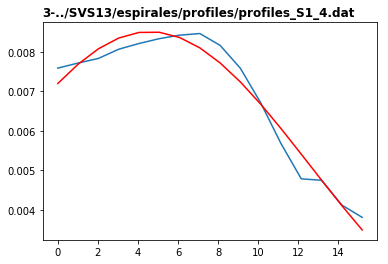

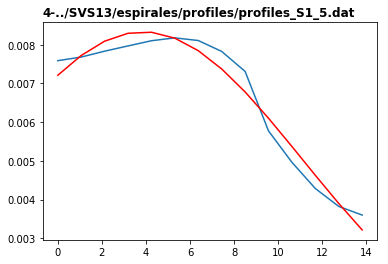

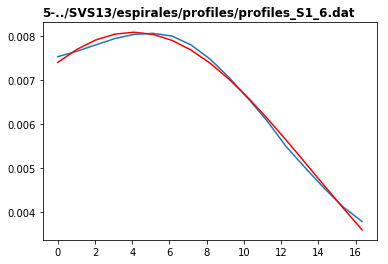

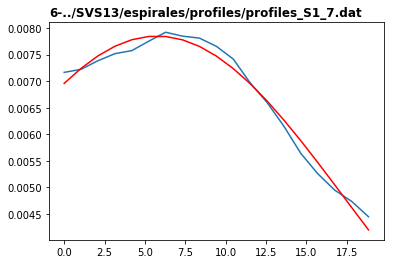

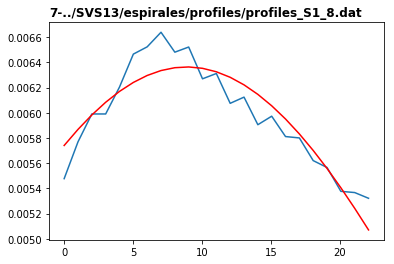

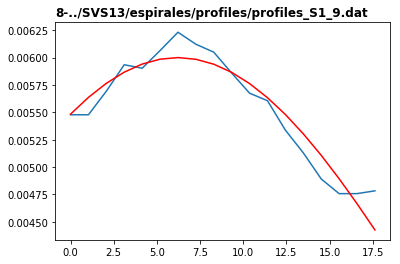

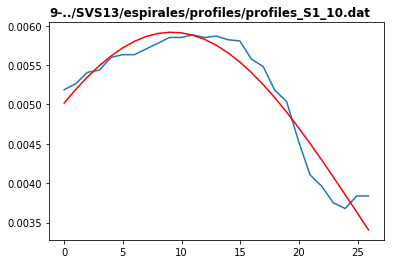

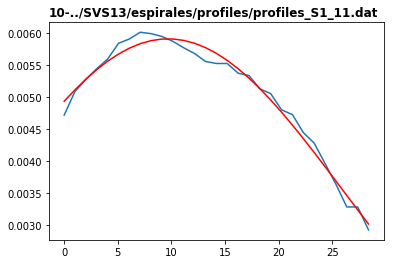

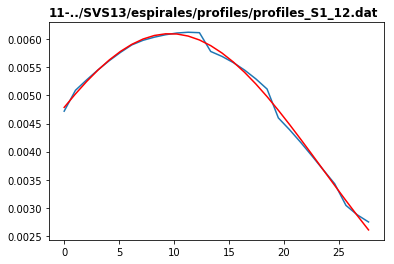

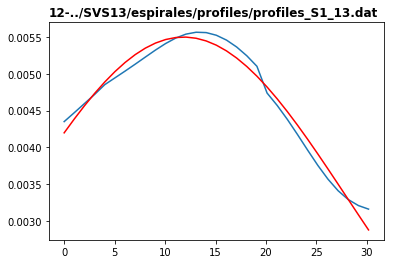

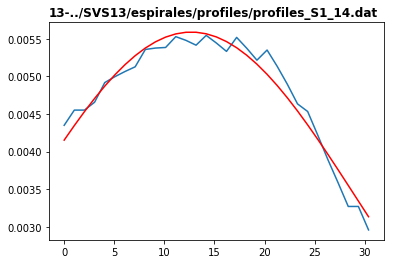

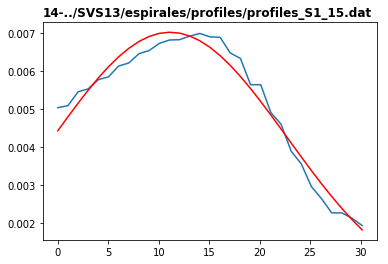

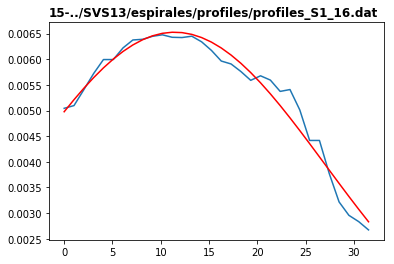

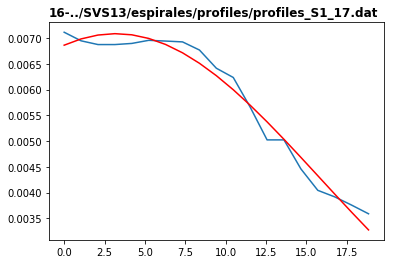

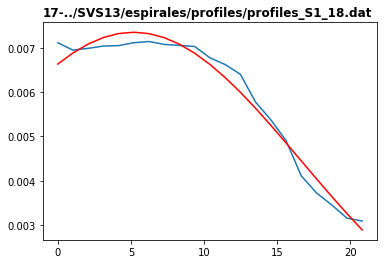

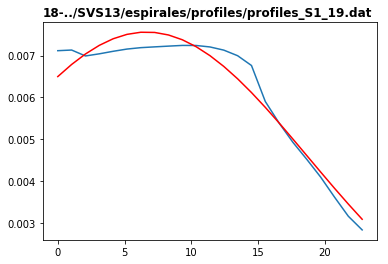

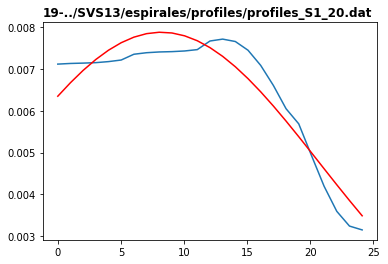

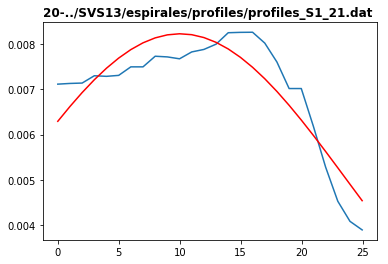

In [5]:
centers = []
amplitudes = []
widths = []
for i, d in enumerate(dist):
    popt, pcov = curve_fit(prof.gaussian, dist[i], value[i]) #, maxfev = 10000
    fit = prof.gaussian(dist[i], *popt)
    l = len(popt)
    amplitudes.append([popt[i] for i in range(0,l,3)])
    centers.append([popt[i+1] for i in range(0,l,3)])
    widths.append([popt[i+2] for i in range(0,l,3)])
    plt.plot(dist[i], value[i])
    plt.plot(dist[i], fit , 'r-')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [6]:
#are you happy with your fits?
#fits image to work with
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [7]:
orig_file = directory+'pixels_S1_ini.dat'
end_file = directory+'pixels_S1_end.dat'
inis = np.loadtxt(orig_file)
ends = np.loadtxt(end_file)

In [8]:
outname = 'S1_axis' 
coords = []
#we want to find the pixels of the maximum points
for i, _ in enumerate(inis):
    x, y = zip(inis[i],ends[i])
    coefficients = np.polyfit(x, y, 1) #line between origin and end
    D = np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2) #distance from origin to end
    deltaY = y[0]-y[1]
    y0 = [y[0]-deltaY/D*d for d in centers[i]] # y coordinate of maximum points (in pixels)
    x0 = (y0 - coefficients[1])/coefficients[0] # x coordinate of maximum points (in pixels)
    pix = [[x0[i],y0[i]] for i in range(len(x0))]
    #and convert them in sky coords
    coords.append([utils.pixel_to_skycoord(p[0], p[1], WCS(hdr)) for p in pix])
# flatten coords
c = [elem for sublist in coords for elem in sublist]
#save them to crtf
crtf.save_coords(directory+outname,c, color='blue',symbol='o')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

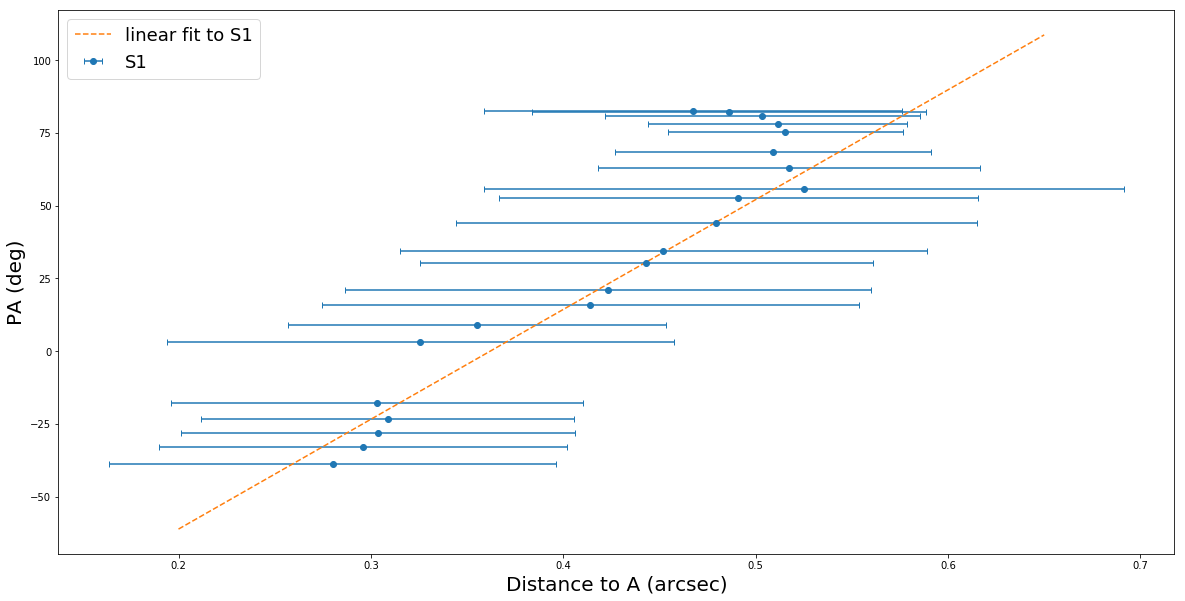

array([681.13436473])

In [10]:
# lets plot ang vs dist to A
iA = 0
jA = len(c)
cel_size = 0.012 #arcsec, this info is the profiles files
angA = [posA.position_angle(i).degree for i in c[iA:jA]]
nangA = prof.new_angle(angA,180)
rA = [posA.separation(i).arcsec for i in c[iA:jA]]
errorA = np.array([elem for sublist in widths[iA:jA] for elem in sublist])*cel_size/2
# lets fit
ifitA = 7
jfitA = len(c)
lineA, resA, _, _, _ = np.polyfit(rA[ifitA:jfitA], nangA[ifitA:jfitA], 1, full=True)
r0A = np.linspace(0.2,0.65,100)
ang0A = lineA[0]*r0A+lineA[1]
plt.figure(figsize=(20,10))
plt.errorbar(rA, nangA, xerr=errorA,fmt='o',capsize=3,label='S1')
plt.plot(r0A, ang0A,'--',label='linear fit to S1')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
plt.xlabel('Distance to A (arcsec)',fontsize=20)
plt.ylabel('PA (deg)',fontsize=20)
plt.legend(fontsize=18)
plt.show()
resA

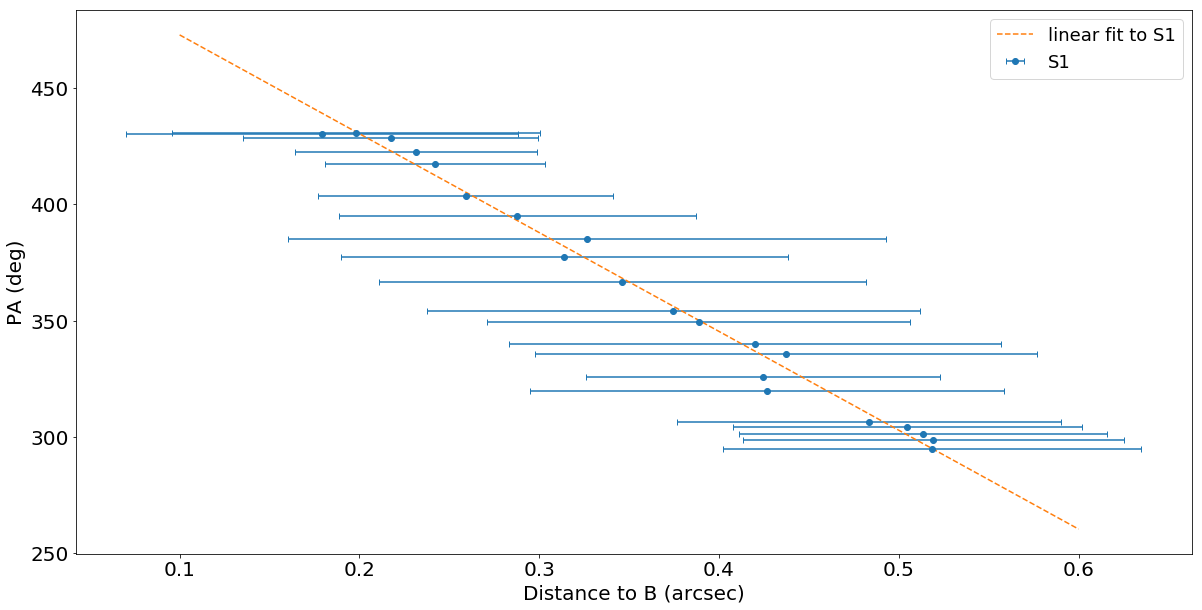

[669.66168723]


In [16]:
# lets plot ang vs dist to B
iB = 0
jB = len(c)
cel_size = 0.012 #arcsec, this info is the profiles files
angB_S1 = [posB.position_angle(i).degree for i in c[iB:jB]]
#nangB_S1 = prof.new_angle(angB_S1,180)
nangB_S1 = []
for a in angB_S1:
    if a<180:
        nangB_S1.append(a+360)
    else: 
        nangB_S1.append(a)
rB_S1 = [posB.separation(i).arcsec for i in c[iB:jB]]
errorB_S1 = np.array([elem for sublist in widths[iB:jB] for elem in sublist])*cel_size/2
# lets fit
ifitB = 0
jfitB = len(c)
lineB_S1, resB_S1, _,_,_ = np.polyfit(rB_S1[ifitB:jfitB], nangB_S1[ifitB:jfitB], 1,full=True)
r0B_S1 = np.linspace(0.1,0.6,100)
ang0B_S1 = lineB_S1[0]*r0B_S1+lineB_S1[1]
plt.figure(figsize=(20,10))
plt.errorbar(rB_S1, nangB_S1, xerr=errorB_S1,fmt='o',capsize=3,label='S1')
plt.plot(r0B_S1, ang0B_S1,'--',label='linear fit to S1')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
plt.xlabel('Distance to B (arcsec)',fontsize=20)
plt.ylabel('PA (deg)',fontsize=20)
plt.legend(fontsize=18)
plt.show()
print(resB_S1)

## S2

In [17]:
directory = '../SVS13/espirales/'
file_base = directory+'/profiles/profiles_S2'
file_name = [file_base+'_'+str(i)+'.dat' for i in range(1,20)]
profile = [np.loadtxt(file) for file in file_name]
dist =  [i[:,0] for i in profile]
value = [i[:,1] for i in profile] 

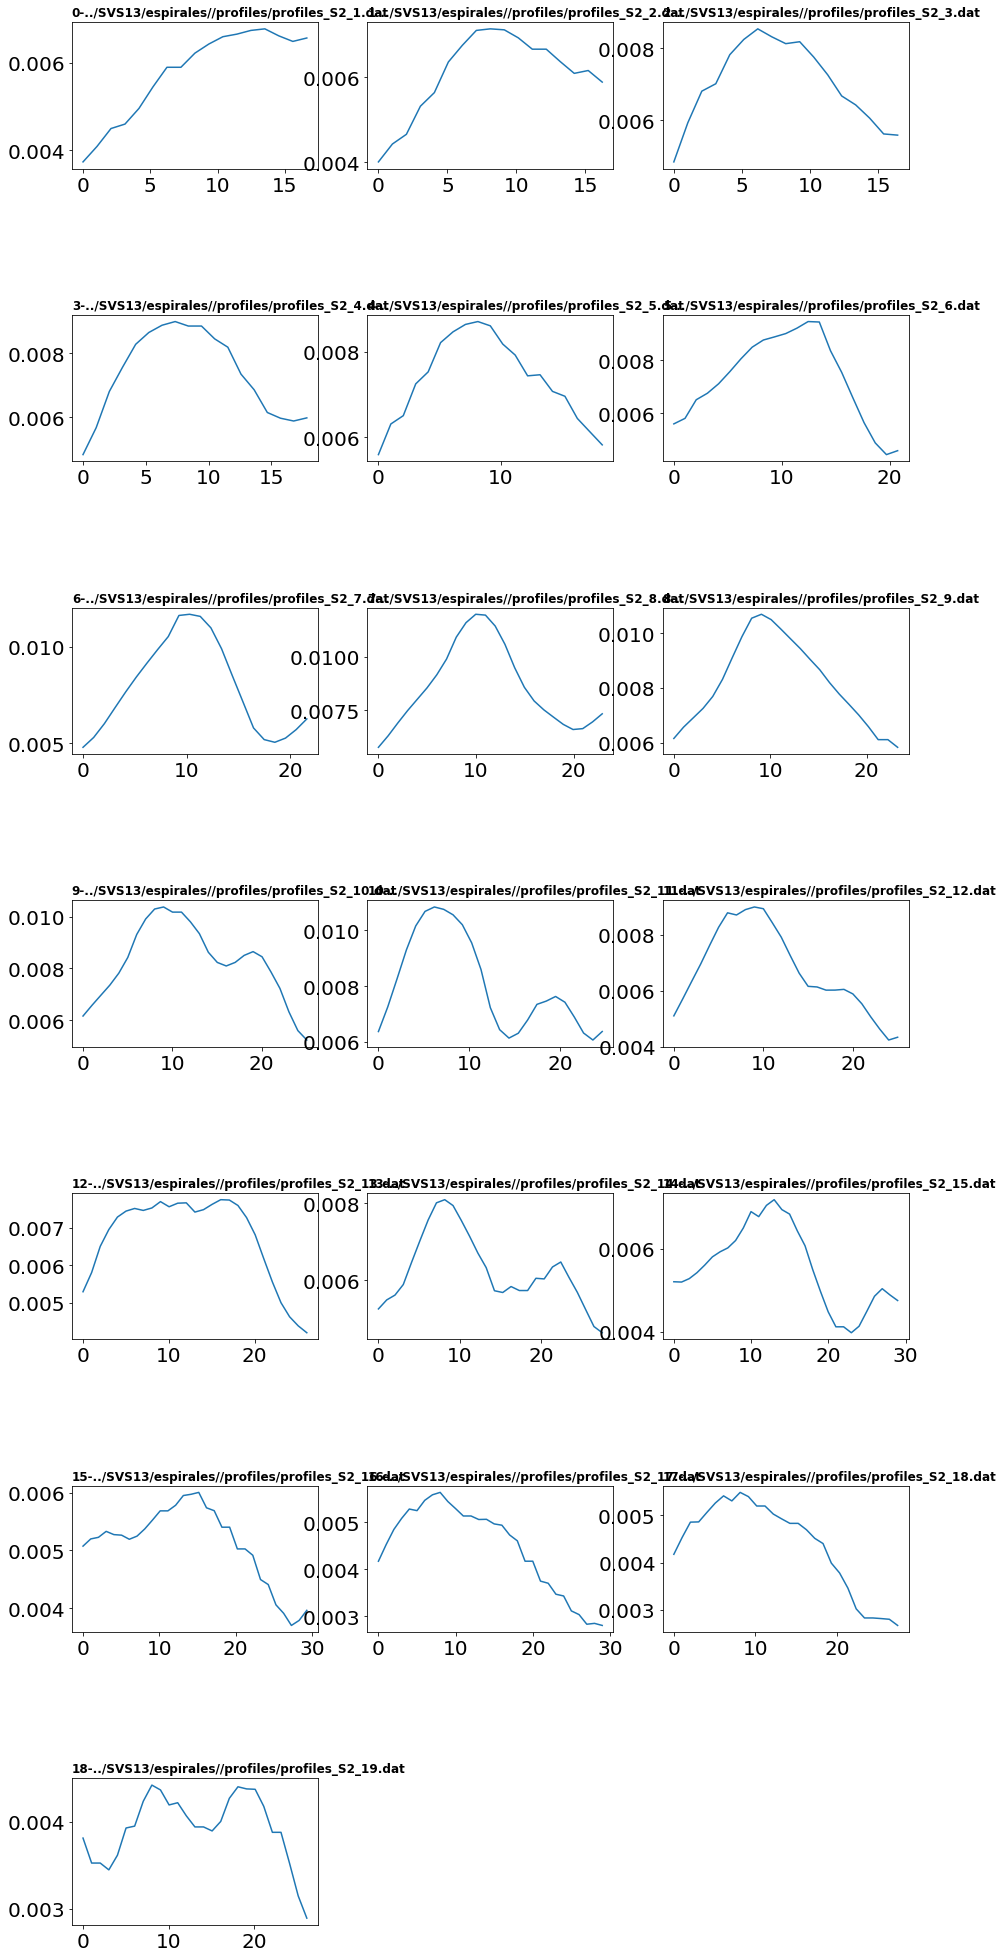

In [18]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_name)):
    # Find the right spot on the plot
    plt.subplot(np.ceil(len(file_name)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(dist[num], value[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_name[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

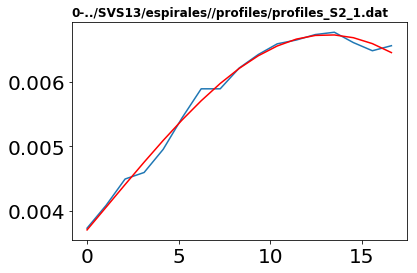

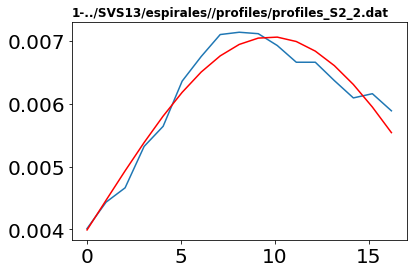

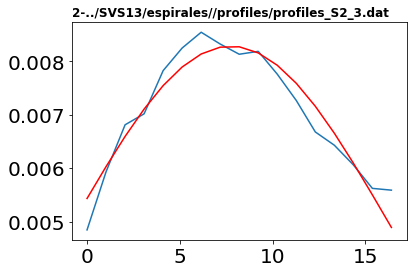

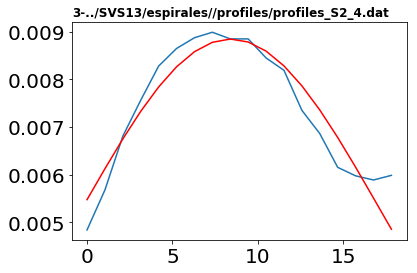

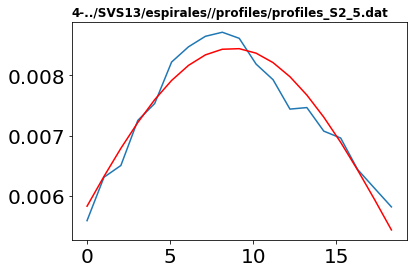

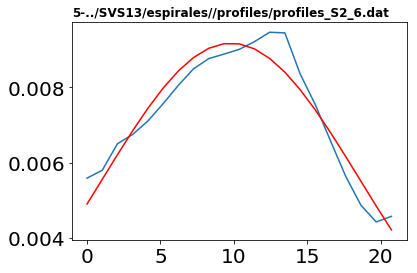

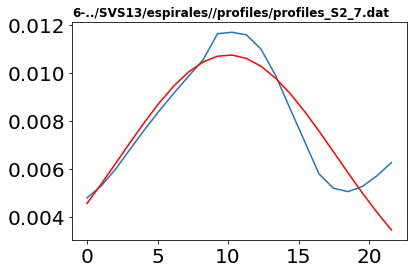

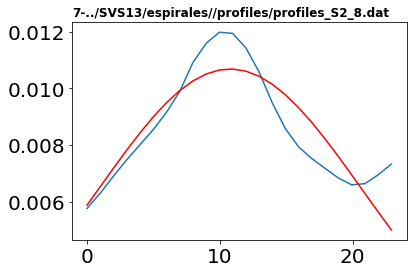

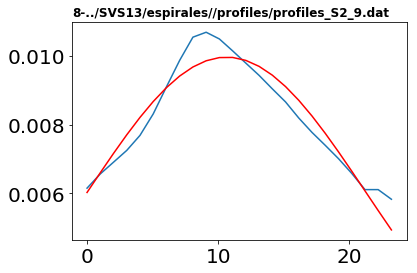

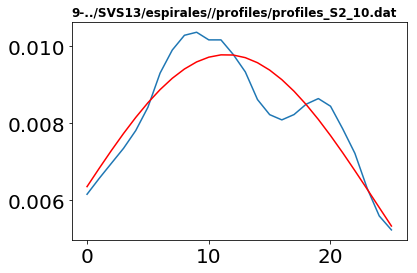

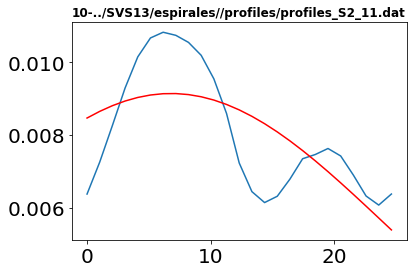

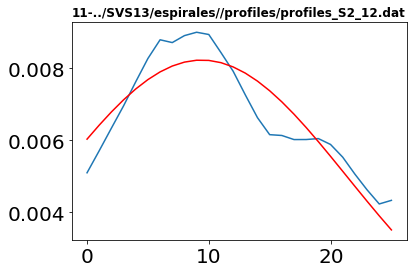

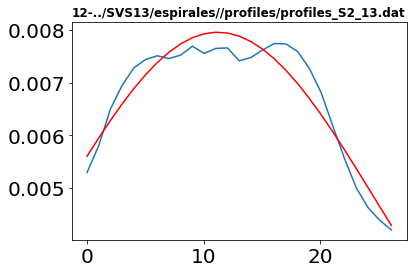

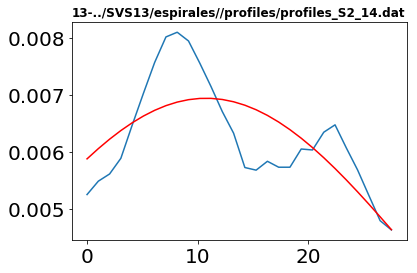

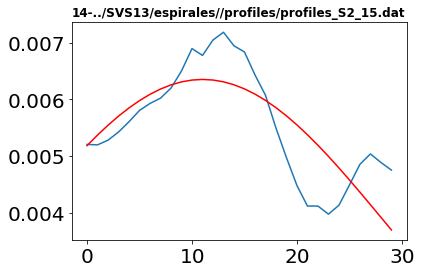

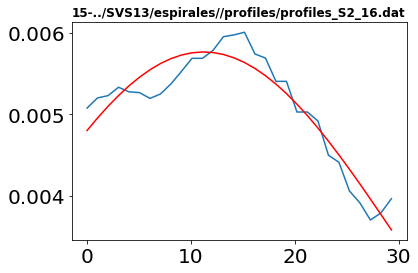

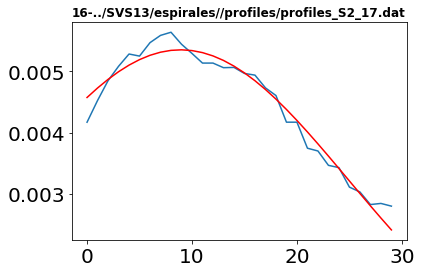

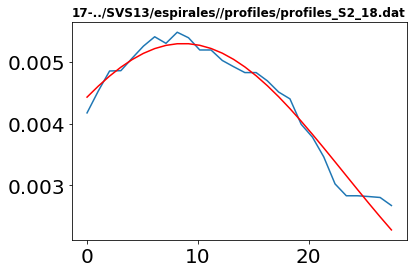

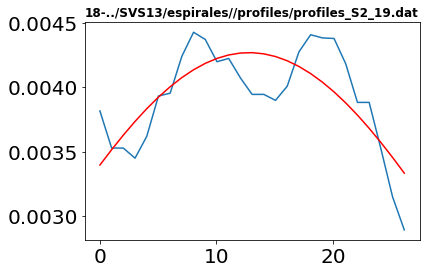

In [19]:
centers = []
amplitudes = []
widths = []
for i, d in enumerate(dist):
    popt, pcov = curve_fit(prof.gaussian, dist[i], value[i]) #, maxfev = 10000
    fit = prof.gaussian(dist[i], *popt)
    l = len(popt)
    amplitudes.append([popt[i] for i in range(0,l,3)])
    centers.append([popt[i+1] for i in range(0,l,3)])
    widths.append([popt[i+2] for i in range(0,l,3)])
    plt.plot(dist[i], value[i])
    plt.plot(dist[i], fit , 'r-')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [20]:
#are you happy with your fits?
#fits image to work with
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [21]:
orig_file = directory+'pixels_S2_ini.dat'
end_file = directory+'pixels_S2_end.dat'
inis = np.loadtxt(orig_file)
ends = np.loadtxt(end_file)

In [22]:
outname = 'S2_axis' 
coords = []
#we want to find the pixels of the maximum points
for i, _ in enumerate(inis):
    x, y = zip(inis[i],ends[i])
    coefficients = np.polyfit(x, y, 1) #line between origin and end
    D = np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2) #distance from origin to end
    deltaY = y[0]-y[1]
    y0 = [y[0]-deltaY/D*d for d in centers[i]] # y coordinate of maximum points (in pixels)
    x0 = (y0 - coefficients[1])/coefficients[0] # x coordinate of maximum points (in pixels)
    pix = [[x0[i],y0[i]] for i in range(len(x0))]
    #and convert them in sky coords
    coords.append([utils.pixel_to_skycoord(p[0], p[1], WCS(hdr)) for p in pix])
# flatten coords
c = [elem for sublist in coords for elem in sublist]
#save them to crtf
crtf.save_coords(directory+outname,c, color='blue',symbol='o')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

In [ ]:
# lets plot ang vs dist to A
iA = 0
jA = len(c)
cel_size = 0.012 #arcsec, this info is the profiles files
angA = [posA.position_angle(i).degree for i in c[iA:jA]]
rA = [posA.separation(i).arcsec for i in c[iA:jA]]
errorA = np.array([elem for sublist in widths[iA:jA] for elem in sublist])*cel_size/2
# lets fit linear
ifitA = 0
jfitA = len(c)-9
lineA, resA, _,_,_ = np.polyfit(rA[ifitA:jfitA], angA[ifitA:jfitA], 1, full=True)
r0A = np.linspace(0.65,0.85,100)
ang0A = lineA[0]*r0A+lineA[1]
plt.figure(figsize=(20,10))
plt.errorbar(rA, angA, xerr=errorA,fmt='o',capsize=3,label='S2')
plt.plot(r0A, ang0A,'--',label='linear fit to S2')
plt.errorbar(rA[-9:], angA[-9:], xerr=errorA[-9:],fmt='om',capsize=3,label='doubtful')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
plt.xlabel('Distance to A (arcsec)',fontsize=20)
plt.ylabel('PA (deg)',fontsize=20)
plt.legend(fontsize=18)
plt.show()
print(resA)

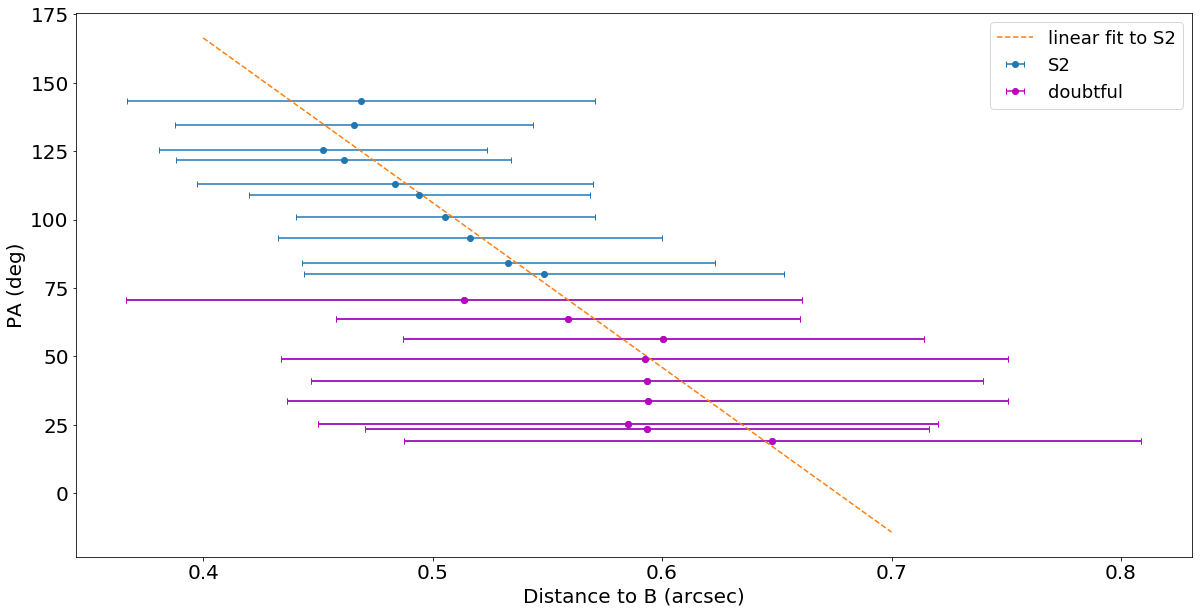

[583.3550653]


In [26]:
# lets plot ang vs dist to B
iB = 0
jB = len(c)
cel_size = 0.012 #arcsec, this info is the profiles files
angB_S2 = [posB.position_angle(i).degree for i in c[iB:jB]]
rB_S2 = [posB.separation(i).arcsec for i in c[iB:jB]]
errorB_S2 = np.array([elem for sublist in widths[iB:jB] for elem in sublist])*cel_size/2
# lets fit linear
ifitB = 0
jfitB = len(c)-9
lineB_S2, resB_S2,_,_,_ = np.polyfit(rB_S2[ifitB:jfitB], angB_S2[ifitB:jfitB], 1, full=True)
r0B_S2 = np.linspace(0.4,0.7,100)
ang0B_S2 = lineB_S2[0]*r0B_S2+lineB_S2[1]
plt.figure(figsize=(20,10))
plt.errorbar(rB_S2, angB_S2, xerr=errorB_S2,fmt='o',capsize=3,label='S2')
plt.plot(r0B_S2, ang0B_S2,'--',label='linear fit to S2')
plt.errorbar(rB_S2[-9:], angB_S2[-9:], xerr=errorB_S2[-9:],fmt='om',capsize=3,label='doubtful')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
plt.xlabel('Distance to B (arcsec)',fontsize=20)
plt.ylabel('PA (deg)',fontsize=20)
plt.legend(fontsize=18)
plt.show()
print(resB_S2)

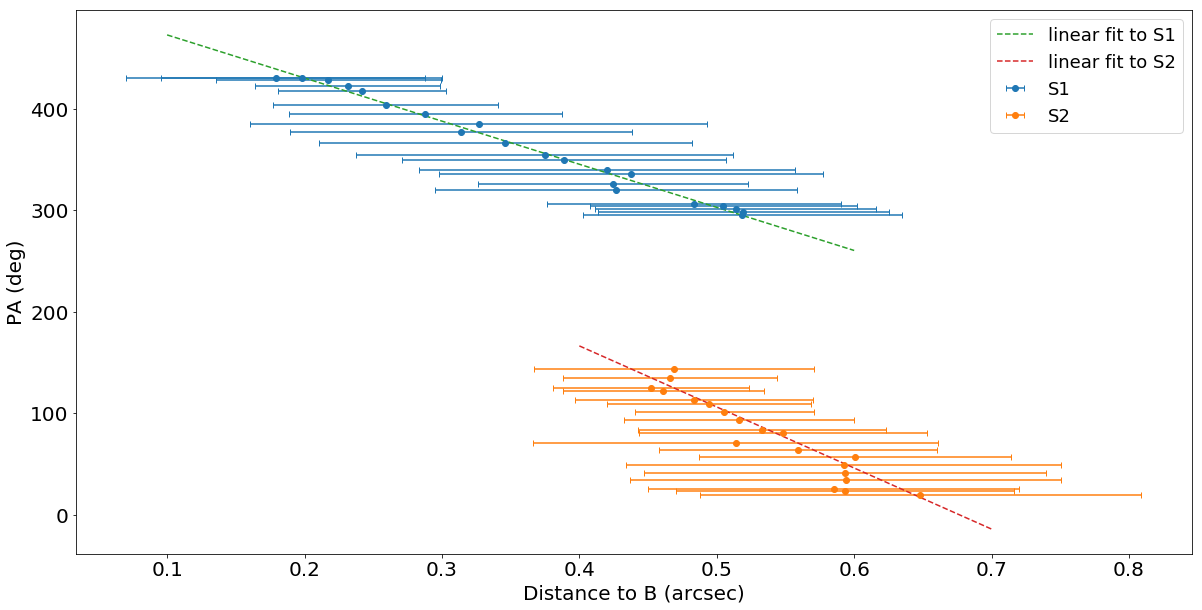

In [27]:
#S1 & S2
plt.figure(figsize=(20,10))
plt.errorbar(rB_S1, nangB_S1, xerr=errorB_S1,fmt='o',capsize=3,label='S1')
plt.errorbar(rB_S2, angB_S2, xerr=errorB_S2,fmt='o',capsize=3,label='S2')
plt.plot(r0B_S1, ang0B_S1,'--',label='linear fit to S1')
plt.plot(r0B_S2, ang0B_S2,'--',label='linear fit to S2')
#plt.errorbar(rB_S2[-9:], angB_S2[-9:], xerr=errorB_S2[-9:],fmt='om',capsize=3,label='doubtful')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
plt.xlabel('Distance to B (arcsec)',fontsize=20)
plt.ylabel('PA (deg)',fontsize=20)
plt.legend(fontsize=18)
plt.show()

##  S3

In [ ]:
directory = '../SVS13/espirales/'
file_base = directory+'/profiles/profiles_S3'
file_name = [file_base+'_'+str(i)+'.dat' for i in range(1,44)]
profile = [np.loadtxt(file) for file in file_name]
dist =  [i[:,0] for i in profile]
value = [i[:,1] for i in profile] 

In [ ]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_name)):
    # Find the right spot on the plot
    plt.subplot(np.ceil(len(file_name)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(dist[num], value[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_name[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

In [ ]:
centers = []
amplitudes = []
widths = []
for i, d in enumerate(dist):
    popt, pcov = curve_fit(prof.gaussian, dist[i], value[i]) #, maxfev = 10000
    fit = prof.gaussian(dist[i], *popt)
    l = len(popt)
    amplitudes.append([popt[i] for i in range(0,l,3)])
    centers.append([popt[i+1] for i in range(0,l,3)])
    widths.append([popt[i+2] for i in range(0,l,3)])
    plt.plot(dist[i], value[i])
    plt.plot(dist[i], fit , 'r-')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [ ]:
#using initial guesses to fit
#write your initial guesses for Gaussian fits in a file, the load it
#guess = np.loadtxt(directory+'guesses/S3_guesses.dat', usecols = range(1,4))
#this has zeros inside to make all the rows with the same size, we remove them later.
# tune your initial guesses until happy

#centers = []
#amplitudes = []
#widths = []
#for i, g in enumerate(guess):
#    g0 = g[np.where(g!=0)] 
#    popt, pcov = curve_fit(prof.func, dist[i], value[i], p0=g0) #, maxfev = 10000
#    fit = prof.func(dist[i], *popt)
#    l = len(popt)
#    centers.append([popt[i] for i in range(0,l,3)])
#    amplitudes.append([popt[i+1] for i in range(0,l,3)])
#    widths.append([popt[i+2] for i in range(0,l,3)])
#    plt.plot(dist[i], value[i])
    #for pt in range(0,len(g0),3):
    #    plt.plot(g0[pt], g0[pt+1],'o')
#    plt.plot(g0[0], g0[1],'o')
#    plt.plot(dist[i], fit , 'r-')
#    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
#    plt.show()

In [ ]:
#are you happy with your fits?
#fits image to work with
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [ ]:
orig_file = directory+'pixels_S3_ini.dat'
end_file = directory+'pixels_S3_end.dat'
inis = np.loadtxt(orig_file)
ends = np.loadtxt(end_file)

In [ ]:
outname = 'S3_axis' 
coords = []
#we want to find the pixels of the maximum points
for i, _ in enumerate(inis):
    x, y = zip(inis[i],ends[i])
    coefficients = np.polyfit(x, y, 1) #line between origin and end
    D = np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2) #distance from origin to end
    deltaY = y[0]-y[1]
    y0 = [y[0]-deltaY/D*d for d in centers[i]] # y coordinate of maximum points (in pixels)
    x0 = (y0 - coefficients[1])/coefficients[0] # x coordinate of maximum points (in pixels)
    pix = [[x0[i],y0[i]] for i in range(len(x0))]
    #and convert them in sky coords
    coords.append([utils.pixel_to_skycoord(p[0], p[1], WCS(hdr)) for p in pix])
# flatten coords
c = [elem for sublist in coords for elem in sublist]
#save them to crtf
crtf.save_coords(directory+outname,c, color='blue',symbol='o')

In [ ]:


ang0A = 360-prof.spiral_log(r0A,*popt_log)
plt.figure(figsize=(20,10))
plt.errorbar(rA, angA, xerr=errorA,fmt='o',capsize=3,label='S3')
plt.plot(r0A, ang0A,'--',label='logaritmic fit to S3')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
plt.xlabel('Distance to A (arcsec)',fontsize=20)
plt.ylabel('PA (deg)',fontsize=20)
plt.legend(fontsize=18)
plt.show()

In [ ]:
# lets plot ang vs dist to A
iA = 0
jA = len(c)
cel_size = 0.012 #arcsec, this info is the profiles files
angA = [posA.position_angle(i).degree for i in c[iA:jA]]
rA = [posA.separation(i).arcsec for i in c[iA:jA]]
errorA = np.array([elem for sublist in widths[iA:jA] for elem in sublist])*cel_size/2
# lets fit linear
ifitA = 4
jfitA = len(c)-8
lineA, resA, _, _, _ = np.polyfit(rA[ifitA:jfitA], angA[ifitA:jfitA], 1, full=True)
r0A = np.linspace(0,1.5,100)
ang0A = lineA[0]*r0A+lineA[1]
# lets fit logaritmic
angOrigA= 360-np.array(angA)
popt_logA, pcov_logA = curve_fit(prof.spiral_log, rA[ifitA:jfitA], angOrigA[ifitA:jfitA])
ang0A_log = 360-prof.spiral_log(r0A,*popt_logA)
plt.figure(figsize=(20,10))
plt.errorbar(rA, angA, xerr=errorA,fmt='o',capsize=3,label='S3')
plt.errorbar(rA[0:4], angA[0:4], xerr=errorA[0:4],fmt='or',capsize=3,label='to remove')
plt.errorbar(rA[-8:], angA[-8:], xerr=errorA[-8:],fmt='om',capsize=3,label='doubtfull')
plt.plot(r0A, ang0A,'--',label='linear fit to S3')
plt.plot(r0A, ang0A_log,'--',label='logaritmic fit to S3')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
plt.xlabel('Distance to A (arcsec)',fontsize=20)
plt.ylabel('PA (deg)',fontsize=20)
plt.legend(fontsize=18)
plt.show()
print(resA)

In [ ]:
# lets plot ang vs dist to B
iB = 0
jB = len(c)
cel_size = 0.012 #arcsec, this info is the profiles files
angB = [posB.position_angle(i).degree for i in c[iB:jB]]
rB = [posB.separation(i).arcsec for i in c[iB:jB]]
errorB = np.array([elem for sublist in widths[iB:jB] for elem in sublist])*cel_size/2
# lets fit
ifitB = 5
jfitB = len(c)-8
lineB, resB, _, _, _ = np.polyfit(rB[ifitB:jfitB], angB[ifitB:jfitB], 1, full=True)
r0B = np.linspace(0.2,1.2,100)
ang0B = lineB[0]*r0B+lineB[1]
# lets fit logaritmic
angOrigB= 360-np.array(angB)
popt_logB, pcov_logB = curve_fit(prof.spiral_log, rB[ifitB:jfitB], angOrigB[ifitB:jfitB])
ang0B_log = 360-prof.spiral_log(r0B,*popt_logB)
plt.figure(figsize=(20,10))
plt.errorbar(rB, angB, xerr=errorB,fmt='o',capsize=3,label='S3')
plt.plot(r0B, ang0B,'--',label='linear fit to S3')
plt.plot(r0B, ang0B_log,'--',label='logaritmic fit to S3')
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
plt.xlabel('Distance to B (arcsec)',fontsize=20)
plt.ylabel('PA (deg)',fontsize=20)
plt.legend(fontsize=18)
plt.show()
print(resB)

#  pendiente  (logaritmic spiral)